# MCMC: comparison of various algorithms

This script illustrates performance of various MCMC algorithms currently integrated in UQpy:
- Metropolis Hastings (MH)
- Modified Metropolis Hastings (MMH)
- Affine Invariant with Stretch moves (Stretch)
- Adaptive Metropolis with delayed rejection (DRAM)
- DE-MC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.stats import multivariate_normal, uniform

from UQpy.SampleMethods import MCMC, MCMC_v2
from UQpy.Distributions import Distribution

## Affine invariant with Stretch moves

This algorithm requires as seed a few samples near the region of interest. Here MH is first run to obtain few samples, used as seed within the Stretch algorithm.

In [2]:
def log_Rosenbrock(x):
     return (-(100*(x[:, 1]-x[:, 0]**2)**2+(1-x[:, 0])**2)/20)

(50, 2)


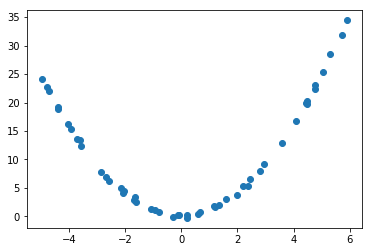

In [3]:
x = MCMC_v2(dimension=2, algorithm='MH', nburn=500, jump=1000, nsamples=50, seed=None, 
            proposal_type='normal', proposal_scale=[1.,1.], 
            log_pdf_target=log_Rosenbrock)
print(x.samples.shape)
plt.plot(x.samples[:,0], x.samples[:,1], 'o')
plt.show()

(2500, 2)


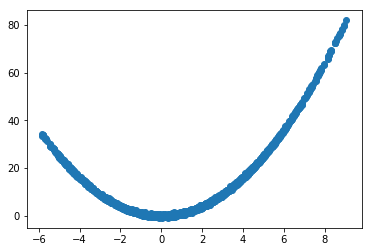

In [4]:
x = MCMC_v2(dimension=2, algorithm='Stretch', nburn=0, jump=100, nsamples=50,
            log_pdf_target=log_Rosenbrock, pdf_target_params=None,
            seed=x.samples, scale=2.)
print(x.samples.shape)
plt.plot(x.samples[:,0],x.samples[:,1],'o')
plt.show()

## DE-MC algorithm

Performance of this algorithm is illustrated on a bimodal target pdf.

In [5]:
# Define log_pdf_target
means = [np.array([10, 1]), np.array([-5, 0])]
covs = [np.array([[1, 0.02], [0.02, 0.2]]), np.array([[1, -0.02], [-0.02, 0.2]])]
def log_pdf_bimodal(x):
    return np.log(0.4*multivariate_normal.pdf(x, mean=means[0], cov=covs[0]) + \
                  0.6*multivariate_normal.pdf(x, mean=means[1], cov=covs[1]))

# Define a function to sample seed uniformly distributed in the 2d space ([-20, 20], [-4, 4])
prior_sample = lambda nsamples: np.array([[-2, -2]]) + np.array([[4, 4]]) * Distribution(
    dist_name=['uniform', 'uniform']).rvs(params=[[0, 1], [0, 1]], nsamples=nsamples)

/Users/audreyolivier/Documents/JHU_Research/UQpy/src/UQpy/SampleMethods.py:2989: UserWarning: Input proposal_type not used in DE-MC algorithm (used inputs are "delta", "c", "c_star", "n_CR", "p_g").
  'Input ' + key + ' not used in DE-MC algorithm (used inputs are "delta", "c", "c_star", '
/Users/audreyolivier/Documents/JHU_Research/UQpy/src/UQpy/SampleMethods.py:2989: UserWarning: Input proposal_scale not used in DE-MC algorithm (used inputs are "delta", "c", "c_star", "n_CR", "p_g").
  'Input ' + key + ' not used in DE-MC algorithm (used inputs are "delta", "c", "c_star", '


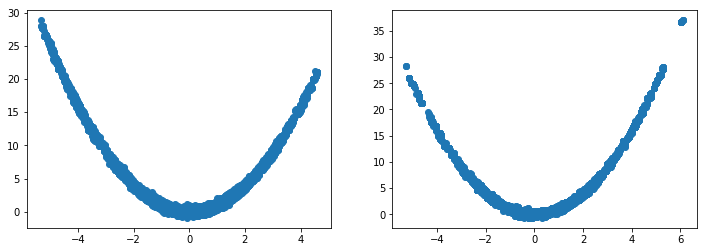

In [6]:
algorithms = ['MH', 'DREAM']
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for i, algorithm in enumerate(algorithms):
    seed = prior_sample(nsamples=7)
    x = MCMC_v2(dimension=2, algorithm=algorithm, nburn=500, jump=10, nsamples=1000, seed=seed, 
                proposal_type='normal', proposal_scale=[1., 1.], concat_chains_=True,
                log_pdf_target=log_Rosenbrock)
    ax[i].plot(x.samples[:, 0], x.samples[:, 1], 'o')
plt.show()

## DRAM algorithm 

time to run MH: 0.36002421379089355s


/Users/audreyolivier/Documents/JHU_Research/UQpy/src/UQpy/SampleMethods.py:2890: UserWarning: Input proposal_type not used in DE-MC algorithm (used inputs are "proposal_scale", "k0", "sp".
  warnings.warn('Input ' + key + ' not used in DE-MC algorithm (used inputs are "proposal_scale", "k0", '


time to run DRAM: 3.128260850906372s


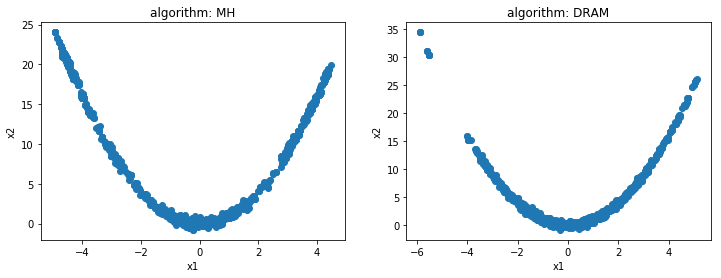

In [7]:
algorithms = ['MH', 'DRAM']
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
for i, algorithm in enumerate(algorithms):
    t = time.time()
    seed = prior_sample(nsamples=1)
    x = MCMC_v2(dimension=2, algorithm=algorithm, nburn=500, jump=10, nsamples=1000, seed=seed, 
                proposal_type='normal', proposal_scale=[1., 1.],
                log_pdf_target=log_Rosenbrock)
    ax[i].plot(x.samples[:, 0], x.samples[:, 1], 'o')
    ax[i].set_xlabel('x1')
    ax[i].set_ylabel('x2')
    ax[i].set_title('algorithm: '+algorithm)
    print('time to run '+algorithm+': {}s'.format(time.time()-t))
plt.show()

## MMH algorithm

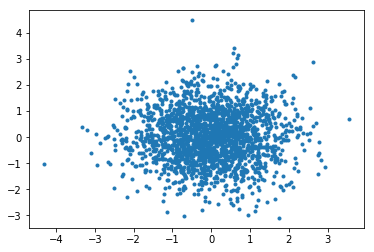

In [8]:
x = MCMC_v2(dimension=2, nburn=100, jump=10, nsamples=1000, seed=np.array([[0., 0.], [1., 1.]]),
            pdf_target=['normal', 'normal'], pdf_target_params=[[0, 1], [0, 1]], 
            algorithm='MMH', pdf_target_type='marginal_pdf', proposal_scale=[1., 1.], proposal_type='normal', 
            )

fig, ax = plt.subplots()
ax.plot(x.samples[:, 0], x.samples[:, 1], linestyle='none', marker='.')

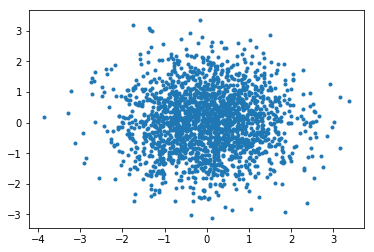

In [9]:
x = MCMC_v2(dimension=2, nburn=100, jump=10, nsamples=1000, seed=np.array([[0., 0.], [1., 1.]]),
            pdf_target=['normal', 'normal'], pdf_target_params=[[0, 1], [0, 1]], 
            algorithm='MMH', pdf_target_type='joint_pdf', proposal_scale=[1., 1.], proposal_type='normal', 
            )

fig, ax = plt.subplots()
ax.plot(x.samples[:, 0], x.samples[:, 1], linestyle='none', marker='.')